In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('data/wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
data[data.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [5]:
data.shape

(178, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
data['Type'].unique()

array([1, 2, 3], dtype=int64)

In [9]:
#sns.pairplot(data.iloc[:,1:])

Text(0.5, 1.0, 'Alcalinity content in various Types')

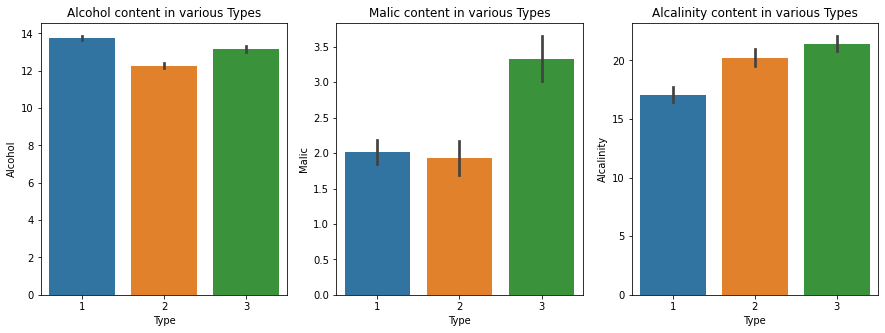

In [10]:
fig , (ax1 , ax2 , ax3) = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x = 'Type' , y = 'Alcohol' , data = data  , ax = ax1)
ax1.set_title('Alcohol content in various Types')

sns.barplot(x = 'Type' , y = 'Malic' , data = data  , ax = ax2)
ax2.set_title('Malic content in various Types')

sns.barplot(x = 'Type' , y = 'Alcalinity' , data = data  , ax = ax3)
ax3.set_title('Alcalinity content in various Types')

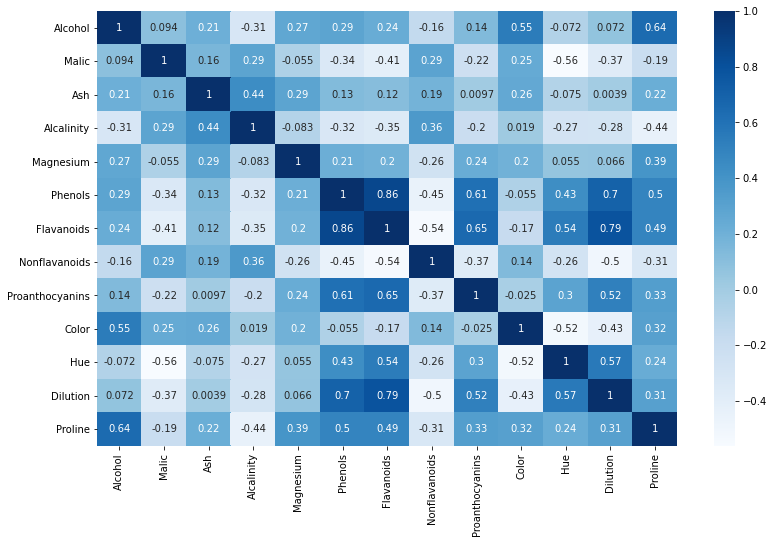

In [11]:
plt.figure(figsize = (13,8))
sns.heatmap(data.iloc[:,1:].corr() , annot = True , cmap = 'Blues')

Text(0.5, 1.0, 'Phenols vs Flavanoids')

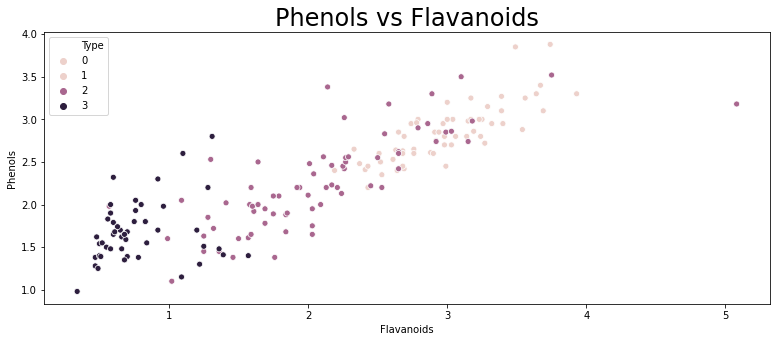

In [12]:
plt.figure(figsize= (13,5))
sns.scatterplot('Flavanoids' , 'Phenols' , data = data , hue = 'Type')
plt.title('Phenols vs Flavanoids', fontsize = 24)

# PCA

In [13]:
mms = MinMaxScaler()

In [14]:
data_norm = mms.fit_transform(data.drop(['Type'] , axis = 1))

In [15]:
pca = PCA(n_components= 10)

In [16]:
pca_values = pca.fit_transform(data_norm)

Text(0.5, 1.0, 'Variance % vs PC')

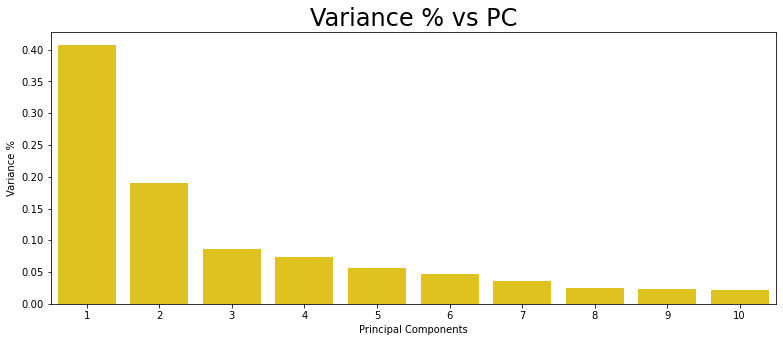

In [17]:
PC = list(range(1, pca.n_components_ + 1))
plt.figure(figsize=(13,5))
sns.barplot(PC , pca.explained_variance_ratio_ , color = 'gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.title('Variance % vs PC' , fontsize = 24)

In [18]:
PCA_components = pd.DataFrame(pca_values)

Text(0.5, 1.0, 'PCA 2 vs PCA 1')

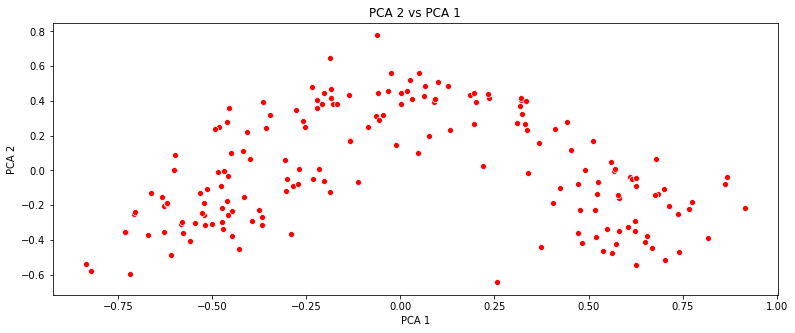

In [19]:
plt.figure(figsize = (13,5))
sns.scatterplot(x = PCA_components[0] , y = PCA_components[1] , color = 'r')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA 2 vs PCA 1')

# K-Means Clustering

In [20]:
PCA_components

,0,1,2,3,4,5,6,7,8,9
0,-0.706336,-0.253193,0.024093,0.013263,-0.026580,-0.074364,0.065172,0.138519,0.118627,0.277443
1,-0.484977,-0.008823,-0.280482,0.075898,-0.238634,-0.071877,0.000686,-0.181193,0.028066,0.114948
2,-0.521172,-0.189187,0.196217,-0.015784,0.045045,0.087116,0.125605,0.023178,-0.222133,-0.017270
3,-0.821644,-0.580906,0.081110,0.012235,-0.004805,0.081987,-0.068418,-0.152253,-0.009376,0.061897
4,-0.202546,-0.059467,0.300240,-0.102051,0.105777,-0.116790,0.057188,-0.009455,0.149605,-0.003043
...,...,...,...,...,...,...,...,...,...,...
173,0.739510,-0.471901,0.209360,0.149727,-0.291769,-0.083834,0.090191,-0.009818,-0.003105,-0.050829
174,0.581781,-0.348366,0.083590,0.075226,0.050316,-0.025295,0.048014,0.047284,-0.047386,-0.081414
175,0.626313,-0.546857,-0.030495,0.170137,0.073738,0.031703,0.186334,-0.037139,-0.001465,0.073544
176,0.572991,-0.425516,-0.094537,-0.137393,0.150559,0.112254,0.148922,-0.024662,0.011399,0.196597


C:\Users\Harshpreet Singh\Anacondajupyternb\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Plot on PCA components')

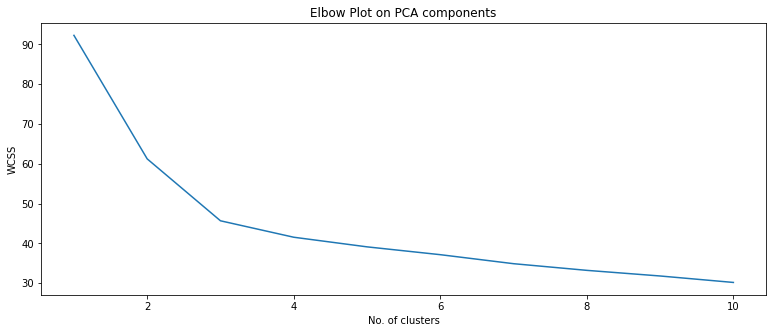

In [21]:
# Elbow plot for PCA components
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , random_state=0)
    kmeans.fit(PCA_components)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13,5))
plt.plot(range(1,11) , wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot on PCA components')

No handles with labels found to put in legend.


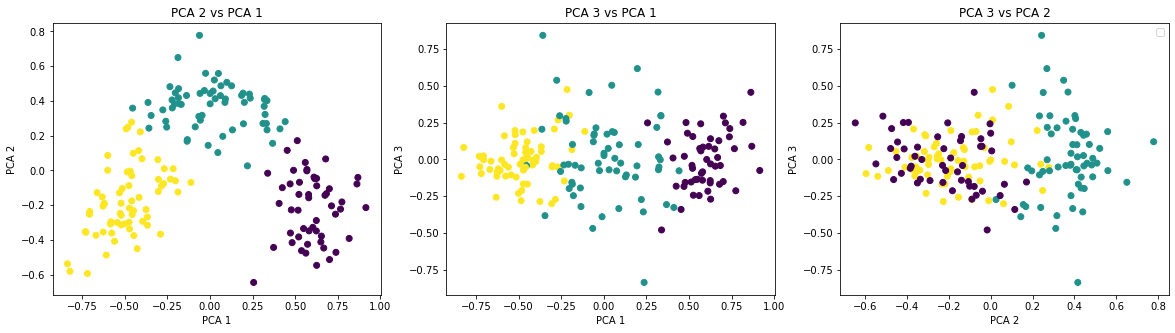

In [22]:
model = KMeans(n_clusters=3 , random_state=0)
model.fit(PCA_components.iloc[: , :3])
labels = model.predict(PCA_components.iloc[: , :3])

fig , (ax1 , ax2 , ax3) = plt.subplots(1,3, figsize = (20,5))

ax1.scatter(PCA_components[0] , PCA_components[1] , c = labels)
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('PCA 2 vs PCA 1')

ax2.scatter(PCA_components[0] , PCA_components[2] , c = labels)
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 3')
ax2.set_title('PCA 3 vs PCA 1')

ax3.scatter(PCA_components[1] , PCA_components[2] , c = labels)
ax3.set_xlabel('PCA 2')
ax3.set_ylabel('PCA 3')
ax3.set_title('PCA 3 vs PCA 2')

plt.legend()

## Distribution of labels over PCAs

In [23]:
PCA_components2 = PCA_components.copy()
PCA_components2['Clusters'] = labels
PCA_components2.rename({0:'PCA 1', 1:'PCA 2' , 2: 'PCA 3'} , axis = 1 ,inplace = True)

In [24]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
PCA_components2 = norm_func(PCA_components2.iloc[: , :-1])
PCA_components2['Clusters'] = labels

In [25]:
PCA_components2['Clusters'].unique()

array([2, 1, 0])

Text(0.5, 1.0, 'Distribution of PCA 3 over Clusters')

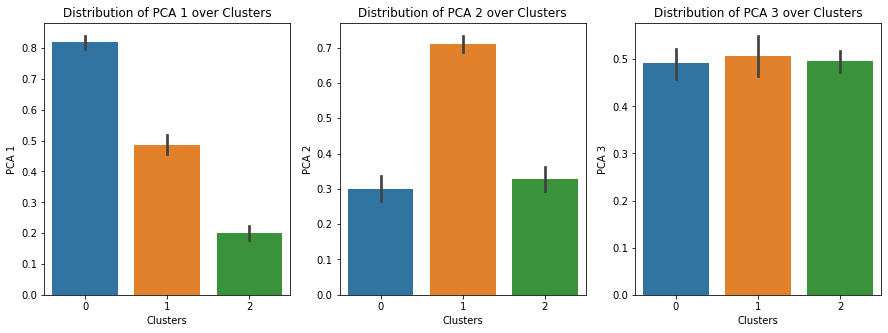

In [26]:
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

sns.barplot(x = 'Clusters' , y = 'PCA 1' , data = PCA_components2 , ax = ax1)
ax1.set_title('Distribution of PCA 1 over Clusters')

sns.barplot(x = 'Clusters' , y = 'PCA 2' , data = PCA_components2 , ax = ax2)
ax2.set_title('Distribution of PCA 2 over Clusters')

sns.barplot(x = 'Clusters' , y = 'PCA 3' , data = PCA_components2 , ax = ax3)
ax3.set_title('Distribution of PCA 3 over Clusters')

C:\Users\Harshpreet Singh\Anacondajupyternb\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Plot on original dataset')

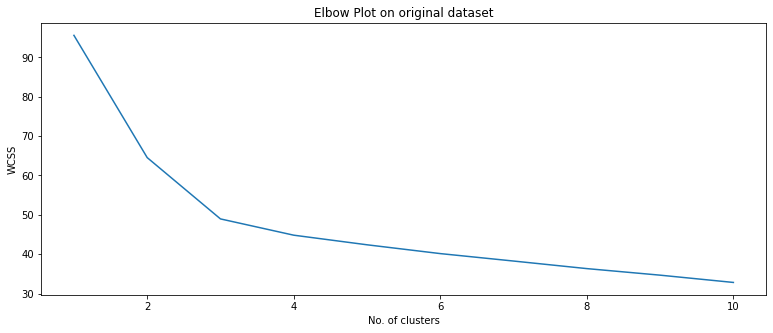

In [27]:
# Elbow plot on original dataset
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , random_state=0)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(13,5))
plt.plot(range(1,11) , wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Plot on original dataset')

In [28]:
model = KMeans(n_clusters=3 , random_state=0)
model.fit(data.iloc[: , 1:])
labels_original = model.predict(data.iloc[: , 1:])

In [29]:
data['Clusters'] = labels_original

Text(0.5, 1.0, 'Alcalinity content in various Clusters')

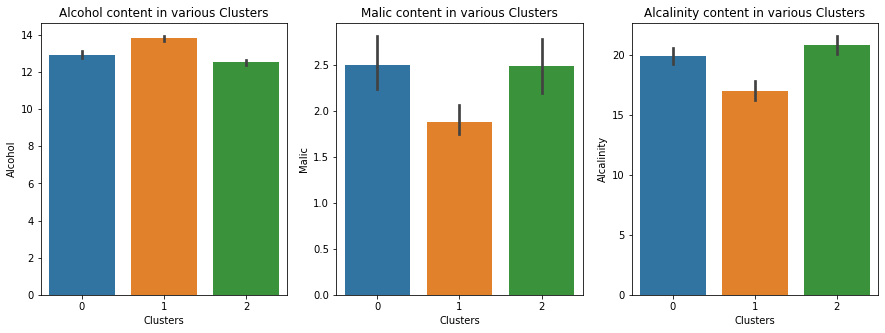

In [30]:
fig , (ax1 , ax2 , ax3) = plt.subplots(1,3, figsize = (15,5))

sns.barplot(x = 'Clusters' , y = 'Alcohol' , data = data  , ax = ax1)
ax1.set_title('Alcohol content in various Clusters')

sns.barplot(x = 'Clusters' , y = 'Malic' , data = data  , ax = ax2)
ax2.set_title('Malic content in various Clusters')

sns.barplot(x = 'Clusters' , y = 'Alcalinity' , data = data  , ax = ax3)
ax3.set_title('Alcalinity content in various Clusters')

# Heirarchical Clusters

In [31]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [32]:
PCA_components = PCA_components.iloc[:,:3]

In [33]:
y_hc = hc.fit_predict(PCA_components)

Text(0.5, 1.0, 'PCA 3 vs PCA 2')

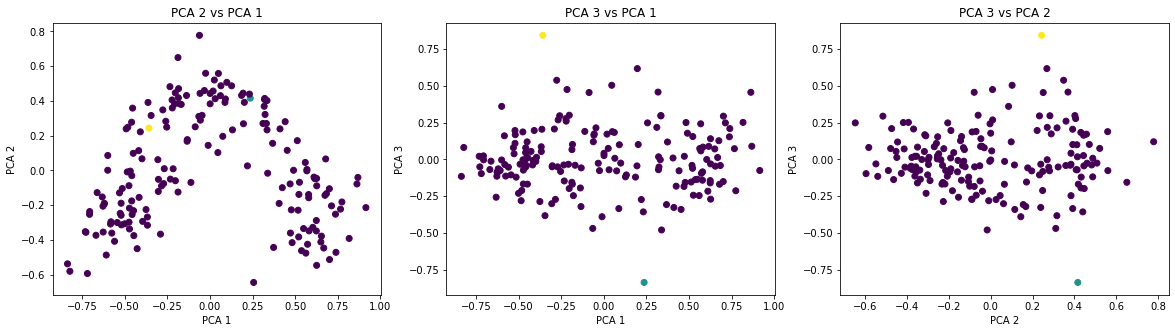

In [34]:
fig , (ax1 , ax2 , ax3) = plt.subplots(1,3, figsize = (20,5))

ax1.scatter(PCA_components[0] , PCA_components[1] , c = y_hc)
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('PCA 2 vs PCA 1')

ax2.scatter(PCA_components[0] , PCA_components[2] , c = y_hc)
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 3')
ax2.set_title('PCA 3 vs PCA 1')

ax3.scatter(PCA_components[1] , PCA_components[2] , c = y_hc)
ax3.set_xlabel('PCA 2')
ax3.set_ylabel('PCA 3')
ax3.set_title('PCA 3 vs PCA 2')

Text(0.5, 1.0, 'Distribution of PCA 3 over Clusters')

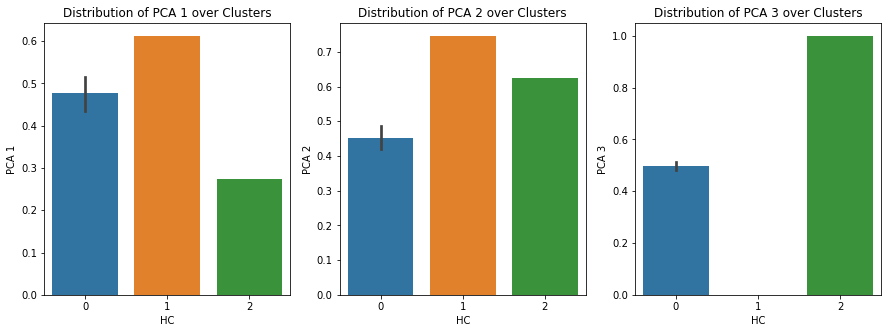

In [35]:
PCA_components2['HC'] = y_hc
fig , (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

sns.barplot(x = 'HC' , y = 'PCA 1' , data = PCA_components2 , ax = ax1)
ax1.set_title('Distribution of PCA 1 over Clusters')

sns.barplot(x = 'HC' , y = 'PCA 2' , data = PCA_components2 , ax = ax2)
ax2.set_title('Distribution of PCA 2 over Clusters')

sns.barplot(x = 'HC' , y = 'PCA 3' , data = PCA_components2 , ax = ax3)
ax3.set_title('Distribution of PCA 3 over Clusters')

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
        395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495]),
 <a list of 50 Text major ticklabel objects>)

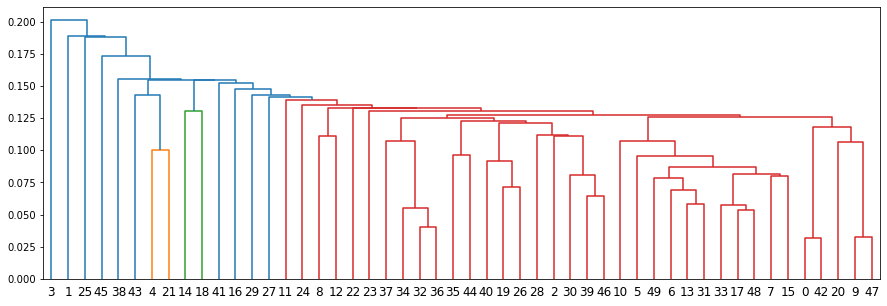

In [36]:
# DENDROGRAM OF FIRST 50 ROWS
plt.figure(figsize = (15,5))
dendrogram = sch.dendrogram(sch.linkage(PCA_components[:50], method='single'))
plt.xticks(rotation = 0 , fontsize = 12)